<a href="https://colab.research.google.com/github/samsoe/matrix/blob/master/notebooks/soil_moisture_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* This notebook explores 6 soil moisture stations on MPG Ranch.  The source file can be downloaded here: [soil_moisture-190611.csv](https://drive.google.com/uc?id=1F-OzrbaqUR28skpxc8Ai6hjpSq_VjSpD)<br>
* The source data was generated in the '[soil moisture collection](https://colab.research.google.com/github/samsoe/matrix/blob/master/notebooks/soil_moisture_collection.ipynb#scrollTo=r4d2DZpBFHzq)' notebook.

# Load


## Libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

%matplotlib inline

## Data

In [0]:
# soil_moisture-190611.csv
src = 'https://drive.google.com/uc?id=1F-OzrbaqUR28skpxc8Ai6hjpSq_VjSpD'

In [0]:
# load csv into pandas dataframe
df = pd.read_csv(src, parse_dates=['Measurement Time'])

# Set the index to the Measurement time
df = df.set_index('Measurement Time')

# Explore

In [5]:
# DatetimeIndex: 320306 entries, 2000-11-07 06:00:00 to 2019-06-09 18:00:00
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 320306 entries, 2000-11-07 06:00:00 to 2019-06-09 18:00:00
Data columns (total 5 columns):
station        320306 non-null object
port           320306 non-null object
depth (in)     320306 non-null int64
measurement    320306 non-null object
value          320306 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 14.7+ MB


In [6]:
# sample of initial data structure
df.head()

,station,port,depth (in),measurement,value
Measurement Time,,,,,
2000-11-07 06:00:00,sainfoin bench,Port 1,6,kPa Potential,-1329.615732
2000-11-07 12:00:00,sainfoin bench,Port 1,6,kPa Potential,-1075.786637
2000-11-07 18:00:00,sainfoin bench,Port 1,6,kPa Potential,-1238.585938
2000-11-08 00:00:00,sainfoin bench,Port 1,6,kPa Potential,-1512.607137
2000-11-08 06:00:00,sainfoin bench,Port 1,6,kPa Potential,-1372.859664


In [7]:
# Unique Moisture Stations collocated with Weather Stations
for station in df.station.unique().tolist():
  print(station.title())

Sainfoin Bench
Baldy Draw
Baldy Summit
Indian Ridge
South Baldy Ridge
Orchard House


In [8]:
df.groupby(pd.Grouper(freq='M')).mean().tail()

,depth (in),value
Measurement Time,,
2019-02-28,19.640884,-559.914245
2019-03-31,20.238683,-362.008098
2019-04-30,20.203969,-2.391087
2019-05-31,20.324324,-8.320512
2019-06-30,20.661654,-44.476264


## Pandas Profiler
[Intro to pandas_profiling - Simple Fast EDA](https://www.kaggle.com/nulldata/intro-to-pandas-profiling-simple-fast-eda)

In [0]:
!pip install pandas-profiling

In [0]:
# load pandas profiler package
import pandas_profiling as pp

In [0]:
# generate html profile report
profile = pp.ProfileReport(df)
profile.to_file("output.html")

In [0]:
# generate report for 2014 - 2018
profile = pp.ProfileReport(df['2014':'2018'])
profile.to_file("output.html")

## 2014 - 2018

In [0]:
df = df['2014':'2018']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 292322 entries, 2014-01-01 00:00:00 to 2018-12-31 18:00:00
Data columns (total 5 columns):
station        292322 non-null object
port           292322 non-null object
depth (in)     292322 non-null int64
measurement    292322 non-null object
value          292322 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 13.4+ MB


In [11]:
# unique measurements
df.measurement.unique()

array(['kPa Potential', '°C Temp'], dtype=object)

In [12]:
# unique depths
df['depth (in)'].unique()

array([ 6, 36])

## Matplotlib

In [0]:
plt.style.use('default')

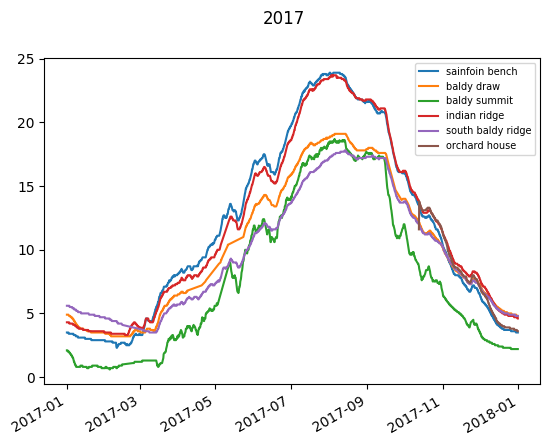

In [65]:
fig, ax = plt.subplots()

for station in df.station.unique():
  year = '2017'
  xf = df[(df['depth (in)'] == 36) & (df['measurement'] == '°C Temp') & (df['station'] == station) & (df['port'] == 'Port 2')]
  xf = xf[year].reset_index()
  ax.plot('Measurement Time', 'value', data=xf, label=station)
  
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
fig.autofmt_xdate()
fig.suptitle(year)
plt.legend(prop={'size': 7})
plt.show()

## Bokeh

In [38]:
df.tail()

,station,port,depth (in),measurement,value
Measurement Time,,,,,
2018-12-30 18:00:00,orchard house,Port 4,36,°C Temp,3.5
2018-12-31 00:00:00,orchard house,Port 4,36,°C Temp,3.5
2018-12-31 06:00:00,orchard house,Port 4,36,°C Temp,3.5
2018-12-31 12:00:00,orchard house,Port 4,36,°C Temp,3.5
2018-12-31 18:00:00,orchard house,Port 4,36,°C Temp,3.5


In [0]:
sample = df[(df['depth (in)'] == 36) & (df.station == 'sainfoin bench')]\
    .groupby(pd.Grouper(freq='D'))\
    .mean()

In [0]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1800 entries, 2014-01-01 to 2018-12-05
Freq: D
Data columns (total 2 columns):
depth (in)    1775 non-null float64
value         1775 non-null float64
dtypes: float64(2)
memory usage: 42.2 KB


In [0]:
import bokeh.io
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

In [0]:
bokeh.io.reset_output()
bokeh.io.output_notebook()

Loading BokehJS ...

In [0]:
p = figure(x_axis_type="datetime", plot_width=800, plot_height=400, title="Z")
p.line(sample.index, sample['kPa Potential'])
show(p)

In [81]:
df.station.unique()

array(['sainfoin bench', 'baldy draw', 'baldy summit', 'indian ridge',
       'south baldy ridge', 'orchard house'], dtype=object)

In [82]:
df.station.unique().tolist()

['sainfoin bench',
 'baldy draw',
 'baldy summit',
 'indian ridge',
 'south baldy ridge',
 'orchard house']

In [83]:
plt.plot(df[(df['depth (in)'] == 6) & (df.station == 'sainfoin bench')]\
    .groupby(pd.Grouper(freq='D'))\
    .mean()['°C Temp'])

KeyError: ignored